In [5]:
%matplotlib inline
from mdt import *
cfg = yaml.load(open("mdt_config.yaml","r").read())

# Load TaskPapers

In [4]:
mp.P_T1 = r"^(.*):$"
mp.C_TITLE = ":"
auth_token = cfg['auth_token']
mp.import_from_dropbox(auth_token, "tmp")
dt = mp.parse_md_files("./tmp/"+"*.taskpaper")
del dt["T2"];del dt["T3"];del dt["ID"]

# Filter tasks only
df = dt[dt.TXT.str.contains("^\s*- ")]
dfs = ms.add_stat(df, "done,p")
dfs.rename(columns={"Filename": "Week", "T1": "Project", "done": "Date", "p":"Time"}, inplace=True)
valid_weeks = dfs.Week.unique().tolist() #valid_weeks.sort()
#dfs[(dfs.Week.isin(valid_weeks[-2:]))]

# Summary

## Daily Task Completion

In [4]:
daily = dfs.groupby(['Week',"Date"]).agg({'Time': ['sum','count'], 'TXT':'count'})
daily.columns = daily.columns.map(mu.flattenCols)
daily.rename(columns={"TXT_count": "Task_total"}, inplace=True)
daily.fillna(0).sort_index(0, ascending=False) #[daily.Week.isin(valid_weeks[-2:])]

Time_sum  Time_count  Task_total
Week     Date                                        
20170205 2017-02-06       0.0           0           1
20170129 2017-02-04       0.0           0           2
         2017-01-31       0.0           0           2
20170122 2017-01-27       4.0           1           1
         2017-01-26       3.0           1           4
         2017-01-25       0.0           0           5
         2017-01-24       8.0           1           2
         2017-01-23       4.0           1           1
20170115 2017-01-21       2.0           1           2
         2017-01-20       0.0           0           1
         2017-01-19       4.0           1           1
         2017-01-18       7.0           1           3
         2017-01-17       4.0           1           2
         2017-01-16       0.0           0           2
20170108 2017-01-14       0.0           0           1
         2017-01-13       0.0           0           2
         2017-01-12       4.0           1           4
         2017-01-11       5.0           2           2
         2017-01-10       7.0           2           5
         2017-01-09       0.0           0           2
         2017-01-08       1.0           1           4
20170101 2017-01-07       0.0           0           2
         2017-01-06       0.0           0           2
         2017-01-05       3.0           1           2
         2017-01-04       0.0           0           3
         2017-01-03       5.0           1           2
         2017-01-02       8.0           2           3

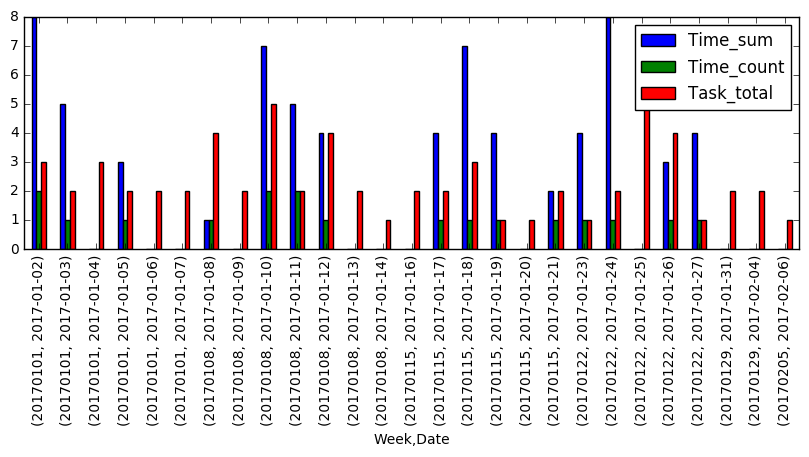

In [5]:
daily.plot(kind="bar", figsize=[10,3])

# Weekly Project 

In [6]:
weekly = dfs.groupby(["Week","Project"]).agg({'Time': ['sum'], 'TXT': 'count', 'Date': 'count'})
weekly.columns = weekly.columns.map(mu.flattenCols)
weekly.rename(columns={"TXT_count": "Task_total", "Date_count": "Task_done"}, inplace=True)
weekly.fillna(0).sort_index(0, ascending=False)

Time_sum  Task_total  Task_done
Week     Project                                    
20170205 Works\MSFT       0.0           1          0
         Work\CSI         0.0           4          0
         Moving           0.0           1          0
         ETC              0.0           4          1
20170129 Work\MS          0.0           4          2
         Work\MDT         0.0           2          0
         Study            0.0           4          1
         Share            0.0           4          0
         ETC              0.0           1          1
         Connect          0.0           2          0
20170122 Work\MS         19.0           7          5
         Work\MDT         0.0           2          0
         Study            0.0           4          0
         Share            0.0           9          5
         ETC              0.0           4          3
20170115 Work\MS         17.0           5          4
         Work\MDT         0.0           2          0
         Study            0.0           3          0
         Share            0.0           6          2
         ETC              0.0           3          1
         Connect          0.0           4          4
20170108 Work\MS         12.0           6          5
         Work\MDT         4.0           5          2
         Study            0.0           6          4
         Share            0.0           5          1
         ETC              1.0           7          5
         Connect          0.0           4          3
20170101 Work\MS         11.0           7          5
         Work\MDT         5.0           2          2
         Study            1.0           1          0
         ETC              1.0           7          3
         Connect          0.0           4          4
         2017-01-03       0.0           3          0

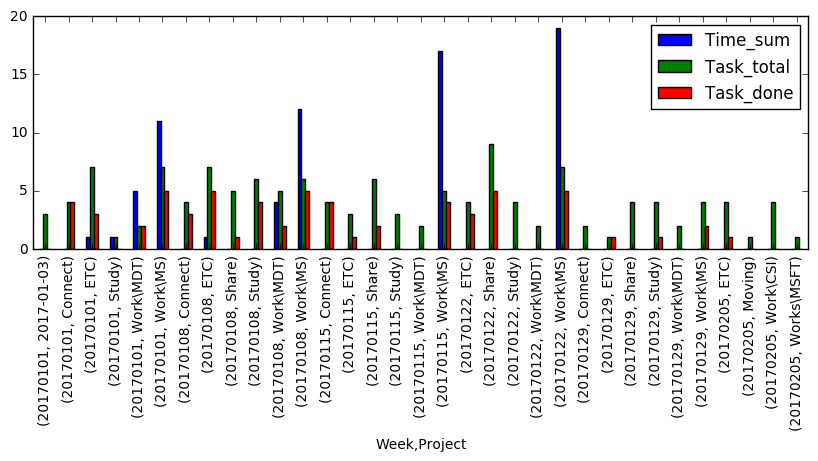

In [7]:
weekly.plot(kind="bar", figsize=[10,3])